In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
#from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

In [3]:
data=pd.read_csv(r"C:\Users\kk\Downloads\Metal_Content_of_Consumer_Products_Tested_by_the_NYC_Health_Department.csv")

In [4]:
data.head()

,ROW_ID,PRODUCT_TYPE,PRODUCT_NAME,METAL,CONCENTRATION,UNITS,MANUFACTURER,MADE_IN_COUNTRY,COLLECTION_DATE,DELETED
0,1,Food-Spice,Turmeric powder,Lead,2.9,ppm,UNKNOWN OR NOT STATED,INDIA,01/04/2011 12:00:00 AM,NaN
1,2,Food-Spice,Cumin powder,Lead,2.4,ppm,UNKNOWN OR NOT STATED,INDIA,01/04/2011 12:00:00 AM,NaN
2,3,Food-Spice,Cumin seeds,Lead,2.8,ppm,UNKNOWN OR NOT STATED,INDIA,01/04/2011 12:00:00 AM,NaN
3,4,Food-Spice,Masala,Lead,12.0,ppm,UNKNOWN OR NOT STATED,UNKNOWN OR NOT STATED,01/04/2011 12:00:00 AM,NaN
4,5,Food-Candy,Tamarind Candy,Lead,-1.0,ppm,UNKNOWN OR NOT STATED,UNKNOWN OR NOT STATED,01/06/2011 12:00:00 AM,NaN


In [5]:
data.tail()

,ROW_ID,PRODUCT_TYPE,PRODUCT_NAME,METAL,CONCENTRATION,UNITS,MANUFACTURER,MADE_IN_COUNTRY,COLLECTION_DATE,DELETED
5604,5605,Toys/Children's Products,Toy,Lead,-1.0,MG/CM^2,UNKNOWN OR NOT STATED,UNKNOWN OR NOT STATED,12/21/2020 12:00:00 AM,NaN
5605,5606,Toys/Children's Products,Toy,Lead,0.1,MG/CM^2,UNKNOWN OR NOT STATED,UNKNOWN OR NOT STATED,12/21/2020 12:00:00 AM,NaN
5606,5607,Toys/Children's Products,Toy,Lead,0.1,MG/CM^2,UNKNOWN OR NOT STATED,UNKNOWN OR NOT STATED,12/21/2020 12:00:00 AM,NaN
5607,5608,Toys/Children's Products,Cake Topper,Lead,-1.0,ppm,UNKNOWN OR NOT STATED,UNITED STATES,12/29/2020 12:00:00 AM,NaN
5608,5609,Other,Sand,Lead,0.7,ppm,UNKNOWN OR NOT STATED,UNITED STATES,12/29/2020 12:00:00 AM,NaN


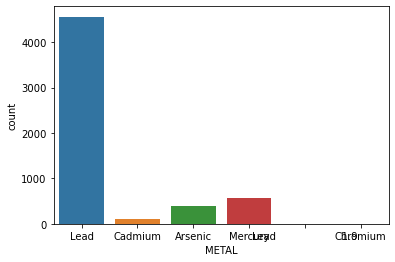

In [8]:
sns.countplot(data['METAL'])

In [20]:
data.isnull()

,ROW_ID,PRODUCT_TYPE,PRODUCT_NAME,METAL,CONCENTRATION,UNITS,MANUFACTURER,MADE_IN_COUNTRY,COLLECTION_DATE,DELETED
0,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...
5604,False,False,False,False,False,False,False,False,False,True
5605,False,False,False,False,False,False,False,False,False,True
5606,False,False,False,False,False,False,False,False,False,True
5607,False,False,False,False,False,False,False,False,False,True


In [11]:
data.isnull().count()

ROW_ID             5609
PRODUCT_TYPE       5609
PRODUCT_NAME       5609
METAL              5609
CONCENTRATION      5609
UNITS              5609
MANUFACTURER       5609
MADE_IN_COUNTRY    5609
COLLECTION_DATE    5609
DELETED            5609
dtype: int64

In [14]:
data.shape

(5609, 10)

In [16]:
data.columns

Index(['ROW_ID', 'PRODUCT_TYPE', 'PRODUCT_NAME', 'METAL', 'CONCENTRATION',
       'UNITS', 'MANUFACTURER', 'MADE_IN_COUNTRY', 'COLLECTION_DATE',
       'DELETED'],
      dtype='object')

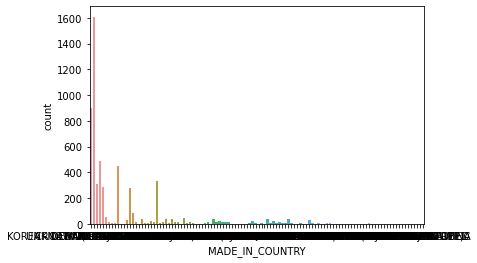

In [17]:
sns.countplot(data['MADE_IN_COUNTRY'])

In [23]:
data.head(10)

,ROW_ID,PRODUCT_TYPE,PRODUCT_NAME,METAL,CONCENTRATION,UNITS,MANUFACTURER,MADE_IN_COUNTRY,COLLECTION_DATE,DELETED
0,1,Food-Spice,Turmeric powder,Lead,2.9,ppm,UNKNOWN OR NOT STATED,INDIA,01/04/2011 12:00:00 AM,NaN
1,2,Food-Spice,Cumin powder,Lead,2.4,ppm,UNKNOWN OR NOT STATED,INDIA,01/04/2011 12:00:00 AM,NaN
2,3,Food-Spice,Cumin seeds,Lead,2.8,ppm,UNKNOWN OR NOT STATED,INDIA,01/04/2011 12:00:00 AM,NaN
3,4,Food-Spice,Masala,Lead,12.0,ppm,UNKNOWN OR NOT STATED,UNKNOWN OR NOT STATED,01/04/2011 12:00:00 AM,NaN
4,5,Food-Candy,Tamarind Candy,Lead,-1.0,ppm,UNKNOWN OR NOT STATED,UNKNOWN OR NOT STATED,01/06/2011 12:00:00 AM,NaN
5,6,Food-Candy,Lucas Muecas candy,Lead,-1.0,ppm,Lucas Muecas,MEXICO,01/06/2011 12:00:00 AM,NaN
6,7,Jewelry,Amulet (Tabeez),Lead,580000.0,ppm,UNKNOWN OR NOT STATED,BANGLADESH,01/13/2011 12:00:00 AM,NaN
7,8,Jewelry,String for amulet/tabeez,Lead,-1.0,ppm,UNKNOWN OR NOT STATED,BANGLADESH,01/13/2011 12:00:00 AM,NaN
8,9,Cosmetics,Surma (Hashmi),Lead,410000.0,ppm,UNKNOWN OR NOT STATED,PAKISTAN,01/19/2011 12:00:00 AM,NaN
9,10,Food-Spice,Powdered red pepper,Lead,-1.0,ppm,UNKNOWN OR NOT STATED,INDIA,01/19/2011 12:00:00 AM,NaN


In [42]:
dfn=data.loc[data['MADE_IN_COUNTRY']=='PAKISTAN']

In [43]:
dfn

,ROW_ID,PRODUCT_TYPE,PRODUCT_NAME,METAL,CONCENTRATION,UNITS,MANUFACTURER,MADE_IN_COUNTRY,COLLECTION_DATE,DELETED
8,9,Cosmetics,Surma (Hashmi),Lead,410000.0,ppm,UNKNOWN OR NOT STATED,PAKISTAN,01/19/2011 12:00:00 AM,NaN
51,52,Food-Spice,Turmeric powder,Lead,-1.0,ppm,National Foods Limited,PAKISTAN,03/16/2011 12:00:00 AM,NaN
226,227,Cosmetics,Surma,Lead,290000.0,ppm,UNKNOWN OR NOT STATED,PAKISTAN,06/16/2011 12:00:00 AM,NaN
283,284,Cosmetics,Surma,Lead,770000.0,ppm,UNKNOWN OR NOT STATED,PAKISTAN,09/02/2011 12:00:00 AM,NaN
289,290,Cosmetics,Surma,Lead,350000.0,ppm,UNKNOWN OR NOT STATED,PAKISTAN,09/08/2011 12:00:00 AM,NaN
...,...,...,...,...,...,...,...,...,...,...
5439,5440,Cosmetics,Kanza Beauty Cream,Mercury,45.0,ppm,UNKNOWN OR NOT STATED,PAKISTAN,03/05/2020 12:00:00 AM,NaN
5567,5568,Dietary Supplement/Medications/Remedy,Ispaghol Husk Fibre,Lead,-1.0,ppm,UNKNOWN OR NOT STATED,PAKISTAN,11/19/2020 12:00:00 AM,NaN
5569,5570,Dietary Supplement/Medications/Remedy,Butrin XL (Bupropion HCl),Lead,-1.0,ppm,Genome Pharmaceuticals (Pvt) Ltd.,PAKISTAN,11/19/2020 12:00:00 AM,NaN
5575,5576,Food-Spice,Bombay Biryani Mix,Lead,-1.0,ppm,Shan Foods (Pvt) Ltd,PAKISTAN,11/20/2020 12:00:00 AM,NaN


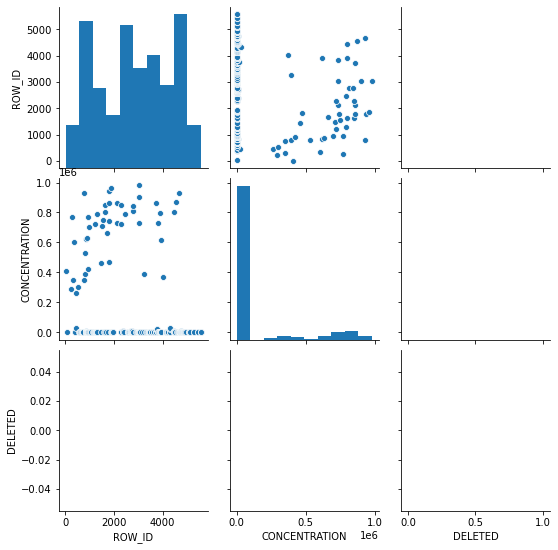

In [44]:
sns.pairplot(dfn)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001898982B340>,
      dtype=object)

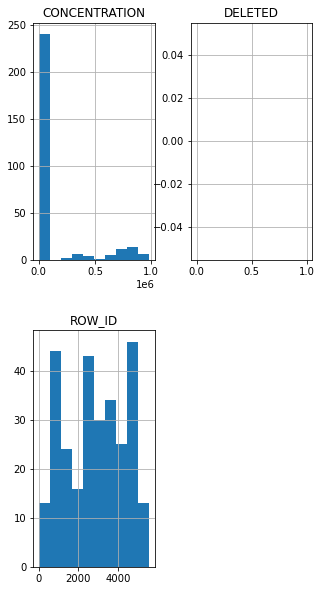

In [45]:
dfn.hist(figsize=(5,10))

In [34]:
dfv=data.loc[data['MADE_IN_COUNTRY']=='INDIA']

In [41]:
dfv

,ROW_ID,PRODUCT_TYPE,PRODUCT_NAME,METAL,CONCENTRATION,UNITS,MANUFACTURER,MADE_IN_COUNTRY,COLLECTION_DATE,DELETED
0,1,Food-Spice,Turmeric powder,Lead,2.9,ppm,UNKNOWN OR NOT STATED,INDIA,01/04/2011 12:00:00 AM,NaN
1,2,Food-Spice,Cumin powder,Lead,2.4,ppm,UNKNOWN OR NOT STATED,INDIA,01/04/2011 12:00:00 AM,NaN
2,3,Food-Spice,Cumin seeds,Lead,2.8,ppm,UNKNOWN OR NOT STATED,INDIA,01/04/2011 12:00:00 AM,NaN
9,10,Food-Spice,Powdered red pepper,Lead,-1.0,ppm,UNKNOWN OR NOT STATED,INDIA,01/19/2011 12:00:00 AM,NaN
10,11,Food-Spice,Turmeric (Haldi),Lead,-1.0,ppm,UNKNOWN OR NOT STATED,INDIA,01/19/2011 12:00:00 AM,NaN
...,...,...,...,...,...,...,...,...,...,...
5564,5565,Food-Spice,Turmeric Powder,Lead,-1.0,ppm,UNKNOWN OR NOT STATED,INDIA,11/17/2020 12:00:00 AM,NaN
5565,5566,Food-Spice,Black Pepper Powder,Lead,-1.0,ppm,UNKNOWN OR NOT STATED,INDIA,11/17/2020 12:00:00 AM,NaN
5566,5567,Food-Spice,Malatthi (Licorice) Powder,Lead,-1.0,ppm,UNKNOWN OR NOT STATED,INDIA,11/17/2020 12:00:00 AM,NaN
5578,5579,Food-Spice,DEEP Ginger powder,Lead,1.1,ppm,Deep Foods,INDIA,11/24/2020 12:00:00 AM,NaN


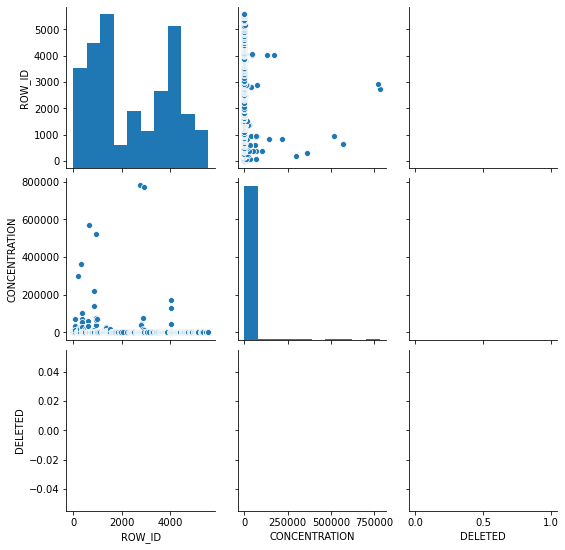

In [36]:
sns.pairplot(dfv)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018986D77AF0>,
      dtype=object)

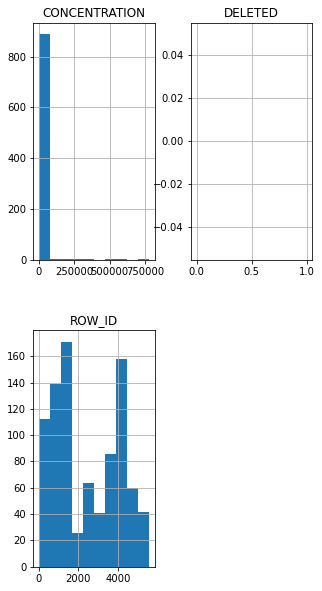

In [40]:
dfv.hist(figsize=(5,10))